# first import lib

In [150]:
#importing sqame lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# load the data we want

In [151]:
#load data 
data=pd.read_excel('C:/Users/kiran/Downloads/asssigenment.xlsx',sheet_name='Data -Testset')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Anomaly
0,99.76,1334,99.607,966,1789295,99.47,98.71,81,99.41,28,32390,34,28,0
1,99.59,1334,99.600,954,1789234,99.18,99.47,76,99.54,30,23101,29,32,0
2,99.01,1357,98.015,978,1789696,99.75,98.96,83,99.33,28,10651,32,34,0
3,99.14,1316,98.169,956,1789159,99.66,99.31,86,99.56,26,24177,33,33,1
4,99.07,1319,98.919,976,1789694,99.14,99.35,78,99.08,26,18134,34,33,0


# check the given data is null or not

In [152]:
data.isnull().sum()

V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
Anomaly    0
dtype: int64

# use standardscaler 


In [153]:
feature = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13']

# separating features
x = data.loc[:,feature]

# separating target
y = data.loc[:,'Anomaly']

#Standardising features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

# befor pca  the dataset shape


In [154]:
data.shape

(240, 14)

# add pca to dataset

In [155]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,data[['Anomaly']]],axis=1)

# after pca the datset shape

In [156]:
finaldf.shape

(240, 3)

# the datset after pca it is 2-D dataset now

In [157]:
finaldf.head()

,pc1,pc2,Anomaly
0,1.975070,-0.490597,0
1,2.246507,-0.670617,0
2,2.368611,0.214067,0
3,2.009143,-0.030211,1
4,2.061224,0.016261,0


In [158]:
finaldf['pc1']

0      1.975070
1      2.246507
2      2.368611
3      2.009143
4      2.061224
         ...   
235   -1.104154
236   -1.386620
237   -0.811740
238   -1.166378
239   -1.314930
Name: pc1, Length: 240, dtype: float64

# check the graph to analyes the problem to which clacification we want to use

Text(0, 0.5, 'Second principle component')

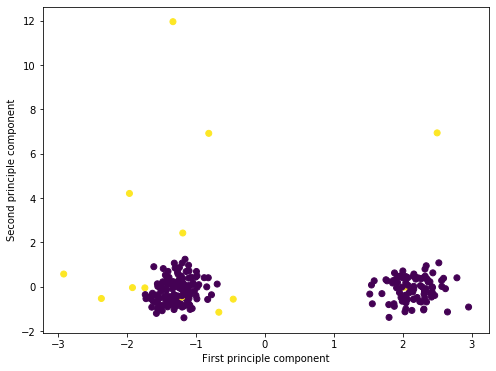

In [159]:
plt.figure(figsize=(8,6))
plt.scatter(finaldf['pc1'],finaldf['pc2'],c=data['Anomaly'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [160]:
pca.explained_variance_ratio_

array([0.22104966, 0.10785611])

# divide data into two i.e dependent and independent variables

In [161]:
x1 = finaldf.iloc[:,1:3].values
y1 = finaldf["Anomaly"].values

# prepare data to train and test

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.20)

# do model

In [163]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [164]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train);
pred = model.predict(X_test)
print(confusion_matrix(Y_test,predict))
print(classification_report(Y_test,predict))


[[43  3]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.00      0.00      0.00         2

    accuracy                           0.90        48
   macro avg       0.48      0.47      0.47        48
weighted avg       0.92      0.90      0.91        48



# check accuracy 

In [165]:
accuracy_score(Y_test,predict)

0.8958333333333334